# Innomatics Data Science Internship Hackathon
Abhinav Shelke

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("movies.csv")
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv("ratings.csv")
links =pd.read_csv("links.csv")

### What is the shape of "movies.csv"?


In [3]:
movies.shape

(9742, 3)

### What is the shape of "ratings.csv"?


In [4]:
ratings.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [5]:
unik=ratings['userId'].nunique()
unik

610

### Which movie has recieved maximum number of user ratings?


In [6]:
ratings_count = ratings.groupby('movieId').size()
max_ratings_movie_id = ratings_count.idxmax()
max_ratings_count = ratings_count.max()

max_ratings_movie = movies[movies['movieId'] == max_ratings_movie_id]
movie_title = max_ratings_movie['title'].values[0]
print(f"Movie with the maximum number of ratings: {movie_title}")
print(f"Number of ratings received: {max_ratings_count}")

Movie with the maximum number of ratings: Forrest Gump (1994)
Number of ratings received: 329


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [7]:
matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']
matrix_movie_id = matrix_movie['movieId'].values[0]

movie_tags = tags[tags['movieId'] == matrix_movie_id]

tags_list = movie_tags['tag'].unique()
print(f"Tags for 'Matrix, The (1999)':")
for tag in tags_list:
    print(tag)

Tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [8]:
terminator_movie = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']
terminator_movie_id = terminator_movie['movieId'].values[0]

terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

average_rating = terminator_ratings['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

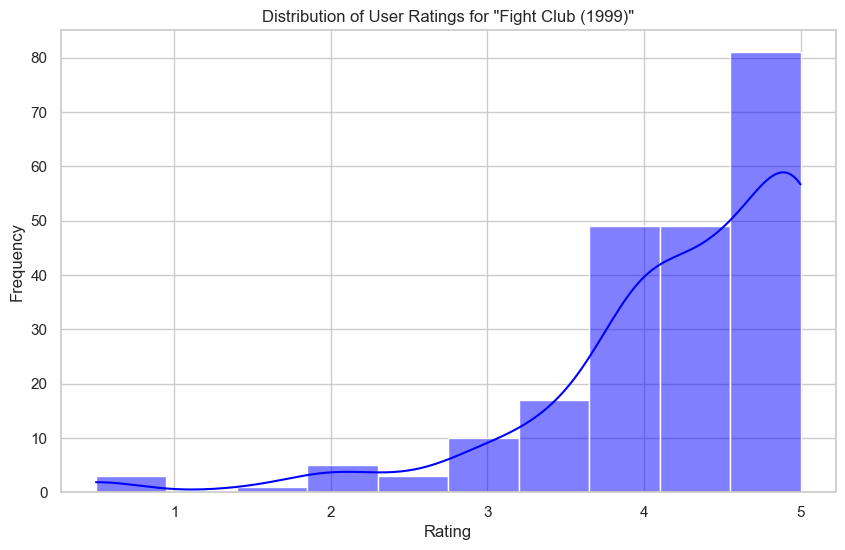

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

fight_club_movie = movies[movies['title'] == 'Fight Club (1999)']
fight_club_movie_id = fight_club_movie['movieId'].values[0]

fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Which movie is the most popular based on  average user ratings?


In [10]:
ratings_grouped = ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

movies_ratings = pd.merge(movies, ratings_grouped, on='movieId')

filtered_movies = movies_ratings[movies_ratings['rating_count'] > 50]

most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

movie_title = most_popular_movie['title']
average_rating = most_popular_movie['average_rating']
rating_count = most_popular_movie['rating_count']

print(f"Most popular movie based on average user ratings:")
print(f"Title: {movie_title}")
print(f"Average Rating: {average_rating:.2f}")
print(f"Number of Ratings: {rating_count}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [11]:
ratings_grouped = ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

movies_ratings = pd.merge(movies, ratings_grouped, on='movieId')

filtered_movies = movies_ratings[movies_ratings['rating_count'] > 50]

top_5_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [12]:

ratings_grouped = ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

movies_ratings = pd.merge(movies, ratings_grouped, on='movieId')

filtered_movies = movies_ratings[movies_ratings['rating_count'] > 50]

movies['genres'] = movies['genres'].astype(str) 

movies['genres'] = movies['genres'].str.split('|')

sci_fi_movies = movies[movies['genres'].apply(lambda x: 'Sci-Fi' in x)]

sci_fi_ratings = pd.merge(sci_fi_movies, filtered_movies, on='movieId')

sorted_sci_fi_movies = sci_fi_ratings.sort_values(by='rating_count', ascending=False)

print(f"Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {movie_title}")
print(f"Number of Ratings: {rating_count}")
    
    

Third most popular Sci-Fi movie based on number of user ratings:
Title: Shawshank Redemption, The (1994)
Number of Ratings: 317
